KMeans: Choosing clusters

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('df_audio_features_5000')
df.head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [337]:
df.columns=df.columns.str.strip(' ')

In [338]:
df.duplicated().sum()

60

In [339]:
df.drop_duplicates(inplace=True)

In [340]:
df.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [341]:
df.drop(['id','type'], axis=1, inplace=True) # drop some columns we are not going to use
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


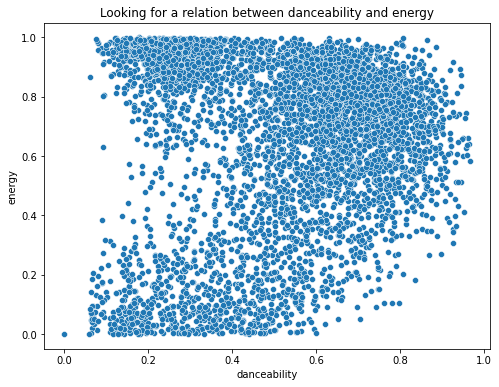

In [342]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='danceability', y='energy')
plt.title('Looking for a relation between danceability and energy')
plt.show()

In [343]:
scale=df[['danceability','energy']]  # let's only use the measurements related to the bill
scale.head()

,danceability,energy
0,0.658,0.2590
1,0.742,0.3990
2,0.851,0.7300
3,0.705,0.0502
4,0.651,0.1190


In [344]:
scale.describe()

,danceability,energy
count,5175.000000,5175.000000
mean,0.507690,0.653314
std,0.218088,0.289361
min,0.000000,0.000000
25%,0.306000,0.476000
50%,0.536000,0.738000
75%,0.686500,0.894500
max,0.967000,1.000000


In [345]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler() -> Transform features by scaling each feature to a given range; default is between 0 and 1. 
# .fit_transform() -> fit finds the minimum and the maximum and transform will change your data in regard to the fit values.
df_norm = MinMaxScaler().fit_transform(scale)

In [346]:
type(df_norm)

numpy.ndarray

In [347]:
# let's see the first 5 observations after normalising the data
df_norm = pd.DataFrame(df_norm) #turn it back into a dataframe
df_norm.columns = ['danceability','energy']
df_norm[:5]

,danceability,energy
0,0.680455,0.2590
1,0.767322,0.3990
2,0.880041,0.7300
3,0.729059,0.0502
4,0.673216,0.1190


In [348]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=27)
kmeans.fit(df_norm)

KMeans(n_clusters=27)

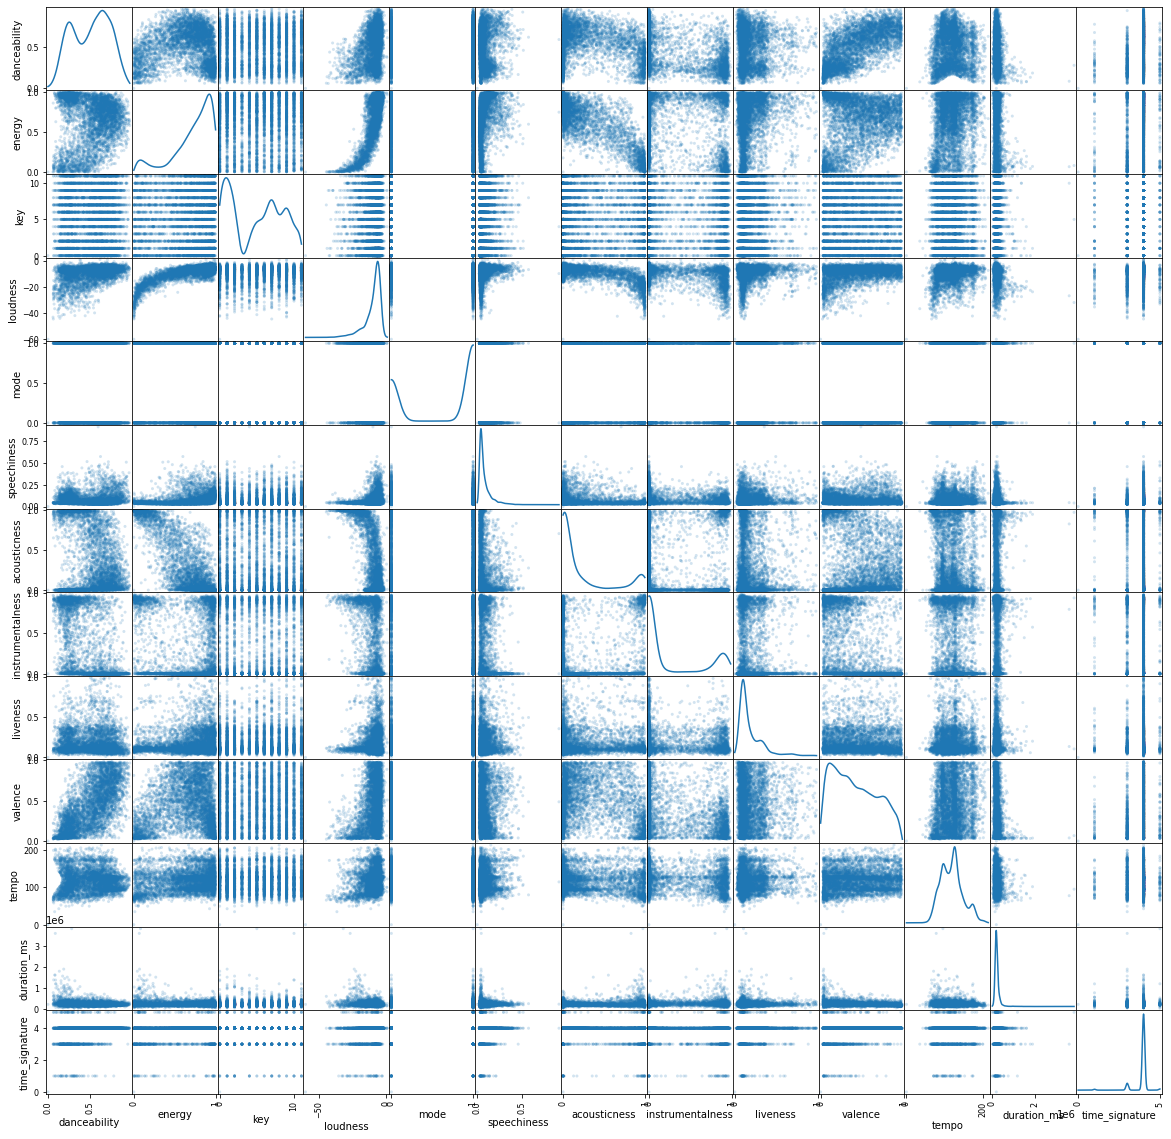

In [349]:
from pandas.plotting import scatter_matrix
fig=scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal="kde")
plt.savefig("try3.png")

In [350]:
kmeans.cluster_centers_

array([[0.43073857, 0.25115323],
       [0.64764501, 0.81594909],
       [0.87651009, 0.66066359],
       [0.24767322, 0.84942077],
       [0.6176208 , 0.33648718],
       [0.48864742, 0.60704412],
       [0.26954973, 0.95969565],
       [0.63896204, 0.51316495],
       [0.15302542, 0.06270584],
       [0.71309218, 0.91646392],
       [0.76419041, 0.75374564],
       [0.76860853, 0.27937778],
       [0.38251588, 0.92692857],
       [0.29369183, 0.46196721],
       [0.47633185, 0.06404202],
       [0.27533662, 0.6952268 ],
       [0.61714301, 0.69660699],
       [0.22365088, 0.2296    ],
       [0.84860106, 0.84091667],
       [0.82625073, 0.48288083],
       [0.72204449, 0.62029787],
       [0.55297955, 0.92043083],
       [0.59927611, 0.15092809],
       [0.32893881, 0.06960776],
       [0.48488891, 0.77445562],
       [0.17197255, 0.95438545],
       [0.50215993, 0.44300709]])

In [351]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability','energy']
cl_pos

,danceability,energy
0,0.430739,0.251153
1,0.647645,0.815949
2,0.876510,0.660664
3,0.247673,0.849421
4,0.617621,0.336487
5,0.488647,0.607044
6,0.269550,0.959696
7,0.638962,0.513165
8,0.153025,0.062706
9,0.713092,0.916464


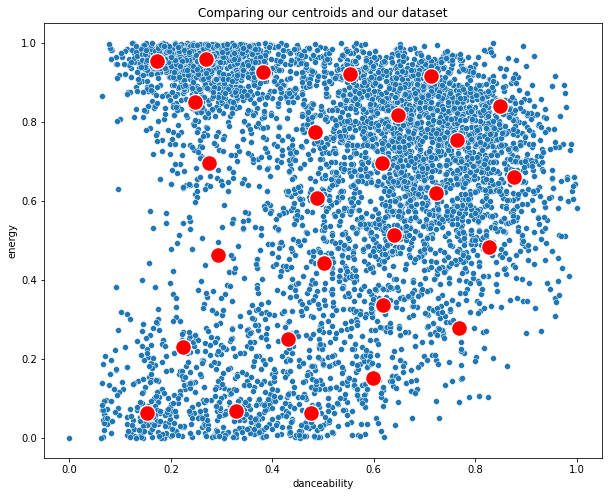

In [352]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(df_norm)
plot_data.columns = ['danceability','energy']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('danceability')
plt.ylabel('energy')
sns.scatterplot(data=plot_data, x='danceability', y='energy')
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='red', s=250)
plt.show()

In [353]:
df['cluster'] = kmeans.labels_
df.sample(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,html,cluster
992,All You Need Is Love - Remastered 2009 ...,The Beatles,0.400,0.480,7,-7.768,1,0.0295,0.346000,0.000031,0.1550,0.653,103.436,230387,4,https://open.spotify.com/track/68BTFws92cRztMS...,26
1016,Baby Love ...,The Supremes,0.595,0.643,5,-9.275,1,0.0365,0.760000,0.000000,0.5380,0.730,135.633,158040,4,https://open.spotify.com/track/5uES1C2NgkdrNHi...,16
233,Mort d'un heroi romàntic ...,Manel,0.650,0.535,4,-5.536,1,0.0323,0.911000,0.000000,0.1200,0.723,114.871,121307,4,https://open.spotify.com/track/6qm8PA7PYvxOqN1...,7
2515,The Masquerade Is Over ...,Benny Golson,0.572,0.207,3,-17.262,1,0.0336,0.905000,0.845000,0.1120,0.624,100.675,280093,4,https://open.spotify.com/track/7rrM7Gg0k7tgCnT...,22
4295,Nothing but Fear ...,Morbid Angel,0.321,0.921,7,-8.931,1,0.1580,0.000108,0.375000,0.0451,0.164,136.015,272133,4,https://open.spotify.com/track/5mwGFR4xmBlbvxc...,12


In [379]:
df.loc[df['cluster'] == 10, ['artist','name']]

,artist,name
12,Marcos Valle,Aqua De Coco ...
32,Marcos Valle,Parabens ...
128,Paulinho Da Viola,Argumento ...
132,Novos Baianos,Swing de Campo Grande ...
136,Jorge Ben Jor,O Namorado Da Viúva ...
...,...,...
5045,Shakira,Perro Fiel (feat. Nicky Jam) ...
5046,ROSALÍA,"Yo x Ti, Tu x Mi ..."
5048,Joey Montana,Picky ...
5097,Idahams,Man On Fire ...


In [355]:
df.groupby(["cluster"]).size()

cluster
0     124
1     274
2     217
3     183
4     117
5     136
6     414
7     195
8     172
9     292
10    286
11     90
12    281
13     61
14    124
15     97
16    229
17    125
18    216
19    192
20    235
21    253
22    110
23    167
24    169
25    275
26    141
dtype: int64

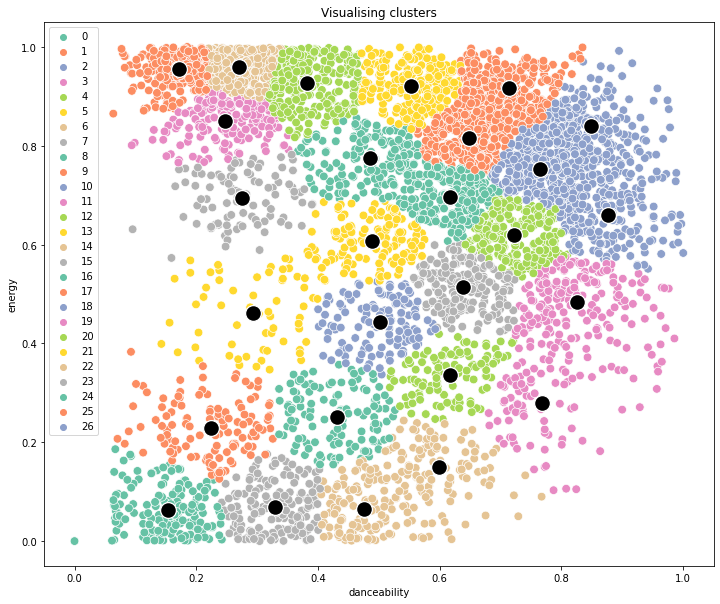

In [356]:
# create plot dataframe
plot_data = pd.DataFrame(df_norm)
plot_data.columns = ['danceability','energy']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Visualising clusters')
plt.xlabel('danceability')
plt.ylabel('energy')

# scatter plot
sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='black', s=250)
plt.show()

Ways to find the right number of clusters:
1.Inertia method
2.Silhouette score

Using inertia

In [357]:
kmeans.inertia_

20.174714014057933

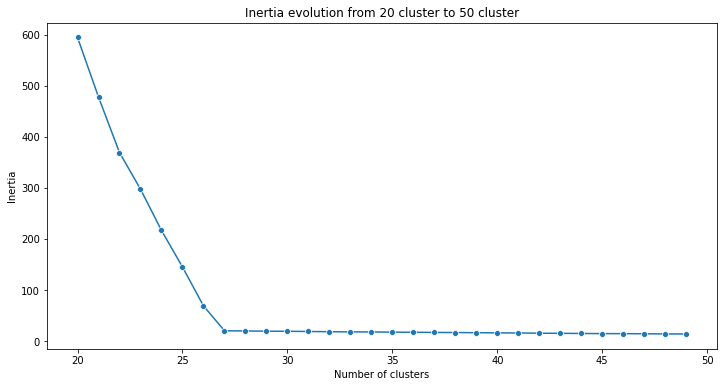

In [358]:
max_k = 50
inertia = []

for k in range(20, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_norm).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 20 cluster to {max_k} cluster')
sns.lineplot(x=range(20, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Silhouette Score

In [359]:
from sklearn.metrics import silhouette_score
silhouette_score(df_norm, kmeans.labels_)

0.9277737489583872

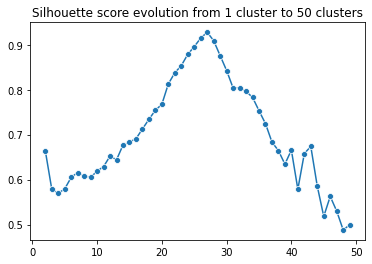

In [360]:
max_k = 50
sil_score = []


for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(df_norm).labels_
    sil_score.append(silhouette_score(df_norm,labels))

plt.title(f'Silhouette score evolution from 1 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

The silhouette coefficient can vary between -1 and +1:

+1	the instance is well inside its own cluster and far from other clusters.
0	the instance is close to a cluster boundary.
-1	the instance may have been assigned to the wrong cluster.

Let's try again, but will all columns and StandardScaler


In [361]:
df_all = df[['danceability','energy','loudness','speechiness','tempo']]
df_all.head()

,danceability,energy,loudness,speechiness,tempo
0,0.658,0.2590,-13.141,0.0705,110.376
1,0.742,0.3990,-12.646,0.0346,125.039
2,0.851,0.7300,-11.048,0.3470,93.698
3,0.705,0.0502,-18.115,0.0471,106.802
4,0.651,0.1190,-19.807,0.0380,120.941


In [362]:
from sklearn.preprocessing import StandardScaler
df_all_norm = StandardScaler().fit_transform(df_all)

kmeans_all = KMeans(n_clusters=27)
kmeans_all.fit(df_all_norm)

KMeans(n_clusters=27)

In [363]:
kmeans_all.cluster_centers_

array([[-1.09486682,  0.59087392, -0.34319078, -0.15129338, -0.75779727],
       [ 0.22353275,  0.45241627,  0.53864646, -0.32409925,  1.71288333],
       [-1.01437953,  1.05521537,  0.44554191,  1.08843917,  0.22689012],
       [-0.94581486, -2.03189448, -2.78400752, -0.52335306,  0.77586709],
       [ 1.04764523, -0.7173978 , -0.28440813, -0.46573716,  0.04512612],
       [ 1.24036504,  0.17391082,  0.51431605,  0.70466417, -0.85411439],
       [-1.28855443, -1.93133788, -2.06858284, -0.5521892 , -1.35528654],
       [ 0.11533835, -0.33802042,  0.11751963, -0.61080073,  0.4431763 ],
       [ 1.21822129,  0.14288574,  0.4766823 ,  2.53276329, -0.77961361],
       [-1.07640467, -1.31495456, -0.63306978, -0.62811058, -1.17934532],
       [ 0.38740143,  0.7198764 ,  0.72935686, -0.45762112,  0.33926489],
       [-0.83681931, -1.21501377, -0.77265005, -0.53886411,  1.95801226],
       [ 0.6832564 ,  0.18028517,  0.4488199 ,  1.39093768,  1.75090115],
       [-0.90530053,  0.92318032,  0.4

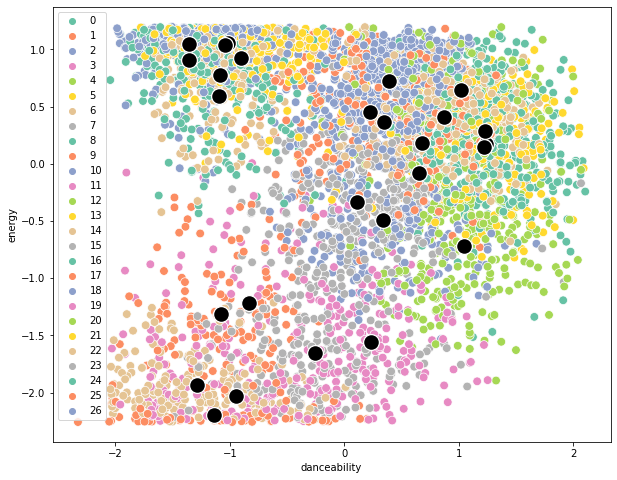

In [364]:
cl_pos = pd.DataFrame(kmeans_all.cluster_centers_)
cl_pos.columns = ['danceability','energy','loudness','speechiness','tempo']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(df_all_norm)
plot_data.columns = ['danceability','energy','loudness','speechiness','tempo']
plot_data['cluster'] = kmeans_all.labels_

sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='black', s=250)
plt.show()

Using inertia

In [365]:
kmeans_all.inertia_

3821.8798442859206

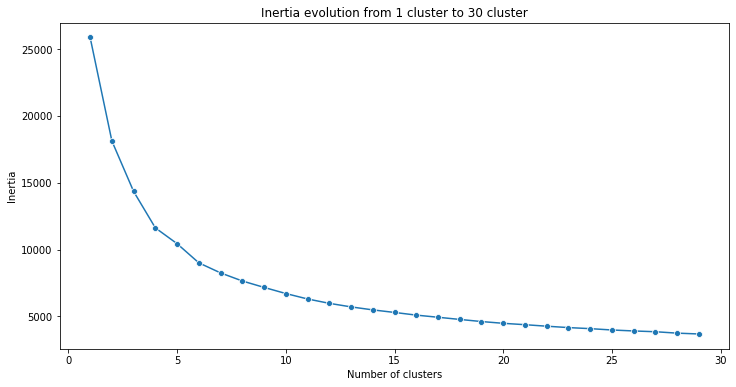

In [366]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_all_norm).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Silhouette Score


In [367]:
from sklearn.metrics import silhouette_score
silhouette_score(df_all_norm, kmeans_all.labels_)

0.21750173434135725

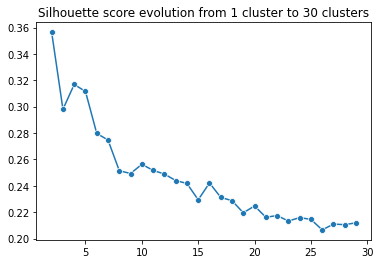

In [368]:
max_k = 30
sil_score = []


for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(df_all_norm).labels_
    sil_score.append(silhouette_score(df_all_norm,labels))

plt.title(f'Silhouette score evolution from 1 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()